# Feature Engineering

## Introduction

Importing dataset and libraries, then reducing dataset using stratified sampling based on target feature

In [1]:
import sanity_checks_methods
import ML_algorithms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()

In [ ]:
df.head(10)

In [ ]:
num_features = df.shape[1]
num_data_points = df.shape[0]

print("Number of features in the dataset: ", num_features)
print("Number of data in dataset: ", num_data_points)

## Sanity checks

In [ ]:
sanity_checks_methods.max_min_commonValue(df)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Nullity Matrix')
plt.show()

**Print duplicates and null values**

In [ ]:
sanity_checks_methods.print_null_duplicates_values(df)

### Checking categorical features values

In [ ]:
sanity_checks_methods.check_categorical_values(df)

Checking negative values for features BMI, Age and glucose level

In [ ]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

for feature in numerical_features:  
    sanity_checks_methods.check_negative_values(df, feature)

**Checking consistency in age and ever_married feature**

In [ ]:
sanity_checks_methods.check_age_married_consistency(df)

**consistency check between age and work_type feature**

In [ ]:
sanity_checks_methods.check_age_workType_consistency(df)

**dropping null**

In [2]:
df = df.dropna()
df = df[df['sex'] >= 0]

**visualizing outliers using z-score**

In [ ]:
sanity_checks_methods.visualize_outliers(df)

## EDA ON ORIGINAL DATASET

### Categorical features frequencies

In [ ]:
categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def plot_categorical_bar_distribution():
    categorical_df = df[categorical_features]
    for column in categorical_features:
        sns.catplot(x=column, kind="count", data=categorical_df, height=6, aspect=1)
    plt.figure(figsize=(8, 8))
    stroke_counts = df['stroke'].value_counts()
    labels = stroke_counts.index
    sizes = stroke_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.show()
        
                
plot_categorical_bar_distribution()

### Numerical features distribution

In [ ]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

def plot_numerical_features():
    numerical_df = df[numerical_features]
    fig, axs = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 6*len(numerical_features)))
    
    for i, column in enumerate(numerical_features):
        sns.histplot(data=numerical_df, x=column, kde=True, ax=axs[i][0])

        sns.boxplot(data=numerical_df, x=column, ax=axs[i][1])
        
        axs[i][0].set_title(f'{column} Distribution')
        axs[i][1].set_title(f'{column} Boxplot')
        
    plt.tight_layout()
    plt.show()

plot_numerical_features()


**Correlation matrix**

In [ ]:
sns.set(rc = {'figure.figsize':(11,9)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')


plt.figure(figsize=(10, 6))
df_corr_with_stroke = df.corrwith(df['stroke']).drop('stroke')
df_corr_with_stroke.plot(kind='bar', grid=True, title="Correlation with Stroke", color="blue")
plt.show()

Correlation and distribution plots between dataset numerical features and target feature

In [ ]:
def print_plots():
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    for column in numerical_features:
        print_box_plot(column)
        print_strip_plot(column)
        print_line_plot(column)
        print_violin_plot(column)
        
    
def print_strip_plot(column):
    plt.figure(figsize=(8, 6))
    sns.stripplot(data=df, x='stroke', y=column)
    plt.title('swarm Plot of Stroke by ' + column)
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_box_plot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="stroke", y=column)
    plt.title(f'Boxplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_line_plot(column):
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=df, x='stroke', y=column)
    plt.title(f'Lineplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
    
def print_violin_plot(column):
    plt.figure(figsize=(8,6))
    sns.violinplot(data=df, x="stroke", y=column)
    plt.title(f'Violinplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
print_plots()

comparison between categorical features and target

In [ ]:

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def print_stacked_barchart(column):
    grouped = df.groupby([column, 'stroke']).size().unstack()
    grouped.plot(kind='bar', stacked=True)
    plt.title(f'Stroke Distribution by {column} ')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_barchart(column):
    plt.figure(figsize=(6, 6))
    sns.countplot(x='stroke', hue=column, data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel('Stroke')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.show()
    
def print_piechart(column):
    plt.figure(figsize=(6, 6))
    sns.pieplot(x=column, hue='stroke', data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_plots():
    for column in categorical_features:
        print_stacked_barchart(column)
        print_barchart(column)
        ##print_piechart(column)

print_plots()

## Models


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3451
           1       0.98      1.00      0.99      3548

    accuracy                           0.99      6999
   macro avg       0.99      0.99      0.99      6999
weighted avg       0.99      0.99      0.99      6999

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5000
           1       0.98      1.00      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


best hyperparameter: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'entropy'}
hyperparameter's time search: 8.9

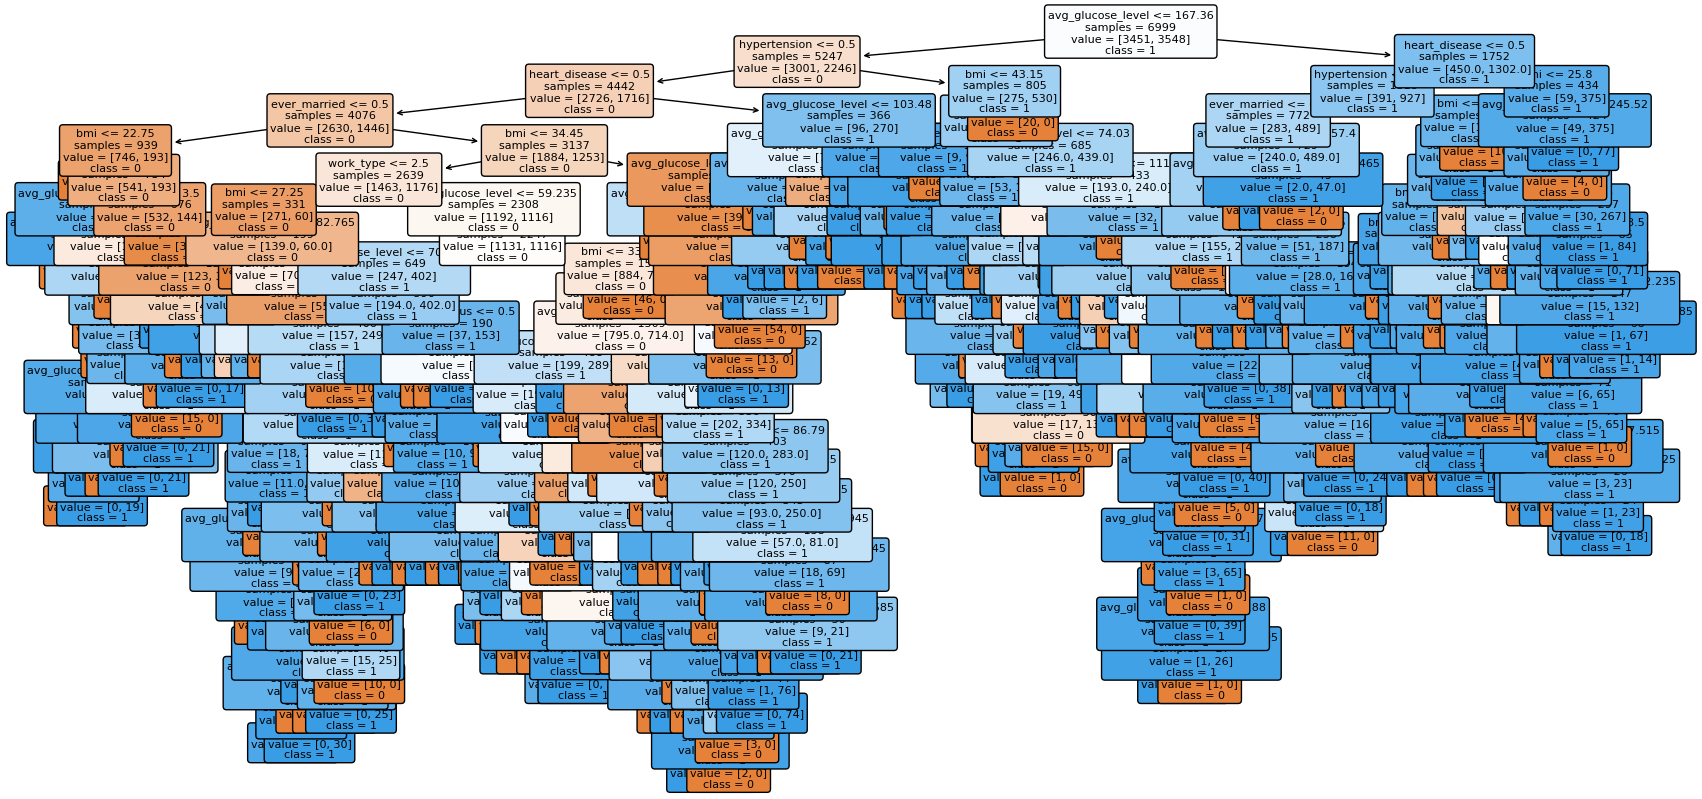

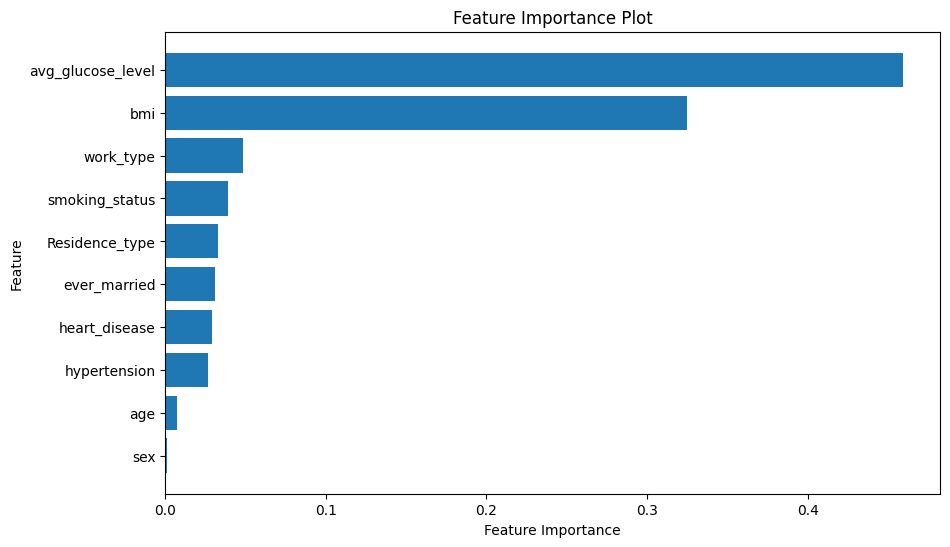

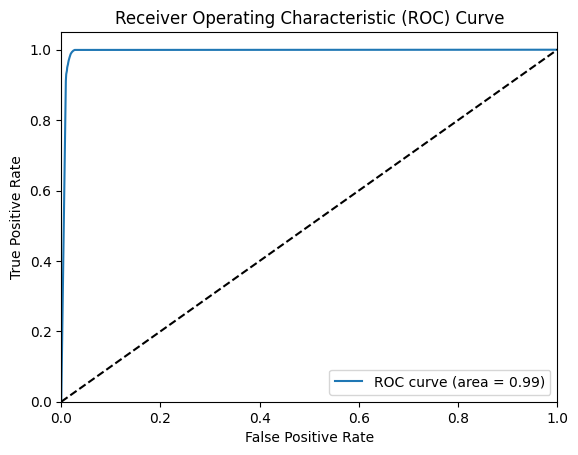

AUC Score: 0.9942688199999999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9628571428571429, 0.9342857142857143, 0.9614285714285714, 0.9771428571428571, 0.9585714285714285, 0.9614285714285714, 0.9471428571428572, 0.98, 0.9685714285714285, 0.9642857142857143]
Mean accuracy: 0.9615714285714285
95% confidence interval: (0.9520278633916585, 0.9711149937511986)


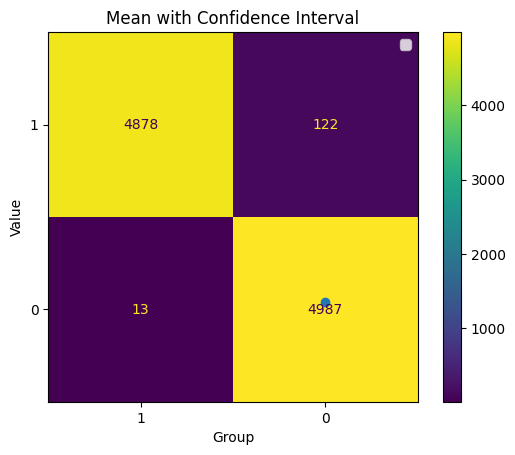


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 41.75373888015747
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.2, 'max_depth': 6, 'max_iter': 334, 'min_samples_leaf': 15}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3451
           1       1.00      1.00      1.00      3548

    accuracy                           1.00      6999
   macro avg       1.00      1.00      1.00      6999
weighted avg       1.00      1.00      1.00      6999

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1548
           1       0.98      1.00      0.99      1452

    accuracy                           0.99      3000
   macro avg       0

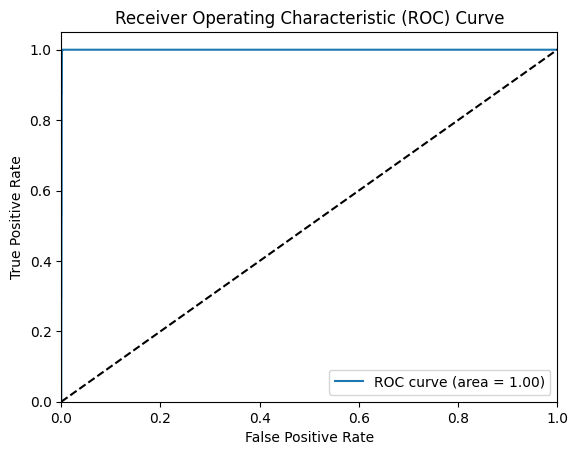

AUC Score: 0.99934832


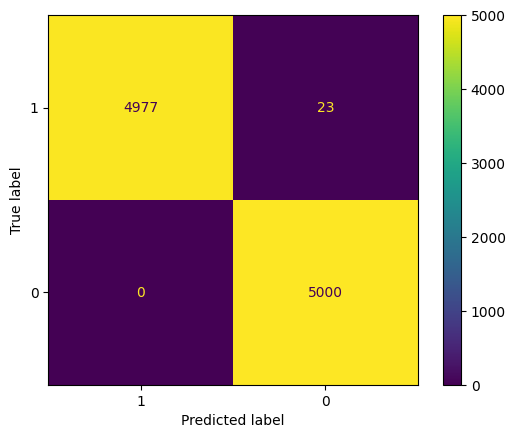

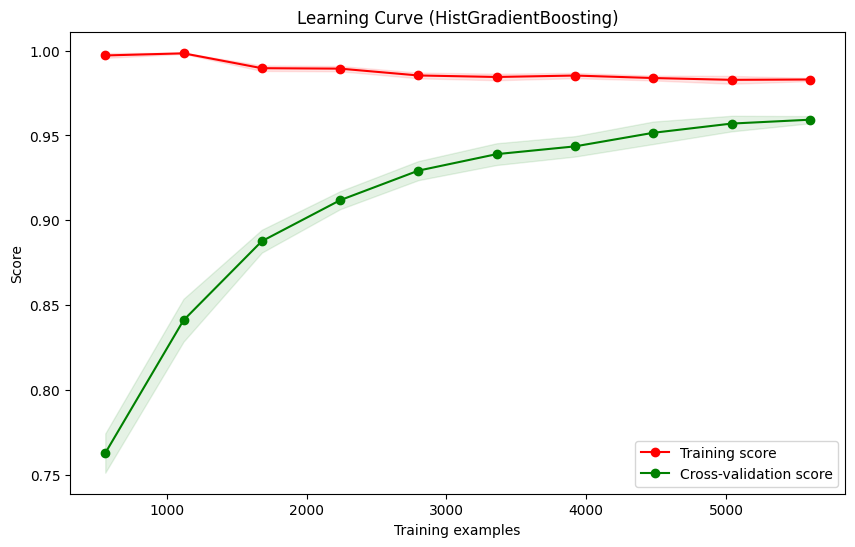

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9914285714285714, 0.9914285714285714, 0.9857142857142858, 0.9885714285714285, 0.99, 0.9828571428571429, 0.9928571428571429, 0.9914285714285714, 0.99, 0.9942857142857143]
Mean accuracy: 0.989857142857143
95% confidence interval: (0.987426828958438, 0.992287456755848)


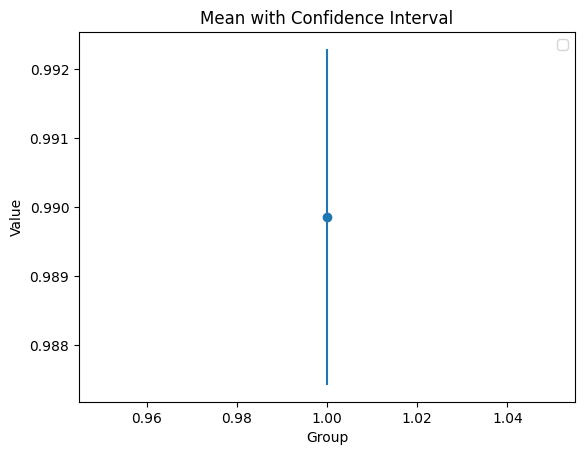

In [4]:
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_to_test) 